# Fashion Articles Classification

In the following notebook we will be analysing the dataset from the fashion-mnist dataset

In [13]:
import pandas as pd
import numpy as np
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

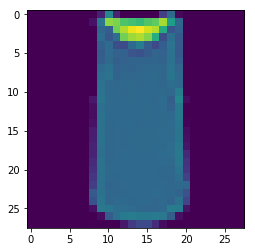

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

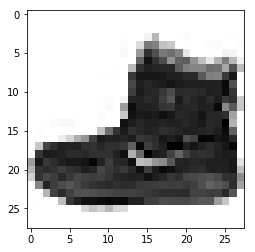

In [16]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [17]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D, Conv2D, Activation
from keras.initializers import Constant

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

CNNModel = Sequential()
CNNModel.add(
    Conv2D(
        32, 
        kernel_size = (2,2), 
        padding = 'same', 
        bias_initializer = Constant(0.02), 
        kernel_initializer = 'random_uniform', 
        input_shape=(1, 28, 28)
    )
)

CNNModel.add(Activation('relu'))
CNNModel.add(MaxPool2D(padding = 'same'))


CNNModel.add(
    Conv2D(
        64, 
        kernel_size = (2,2), 
        padding = 'same', 
        bias_initializer = Constant(0.02), 
        kernel_initializer = 'random_uniform'
    )
)

CNNModel.add(Activation('relu'))
CNNModel.add(MaxPool2D(padding = 'same'))

CNNModel.add(Flatten())

CNNModel.add(Dense(128, activation = 'relu', kernel_initializer = 'random_uniform', bias_initializer = Constant(0.02)))

CNNModel.add(Dense(10, activation = 'softmax'))


CNNModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 28, 32)         3616      
_________________________________________________________________
activation_7 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 14, 64)         8256      
_________________________________________________________________
activation_8 (Activation)    (None, 1, 14, 64)         0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 448)               0         
__________

## Training

In [19]:
CNNModel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

CNNModel.fit(X_train, Y_train, epochs = 15, batch_size = 32, verbose = 1)

scores = CNNModel.evaluate(X_test, Y_test, verbose = 1)

print('Total loss ', scores[0])
print('Total accuracy ', scores[1])

Epoch 1/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.1329 - acc: 0.9487
Epoch 2/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.1257 - acc: 0.9533: 2s - loss: 0.1192 - acc 
Epoch 3/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.1189 - acc: 0.9553: 0s - loss: 0.1174 -
Epoch 4/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.1129 - acc: 0.9572: 1s - loss:
Epoch 5/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.1064 - acc: 0.9601
Epoch 6/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.1021 - acc: 0.9612
Epoch 7/15
60000/60000 [==============================] - 5s 75us/step - loss: 0.0981 - acc: 0.9625
Epoch 8/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0920 - acc: 0.9641
Epoch 9/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0892 - acc: 0.9662
Epoch 10/15
60000/60000 [================